In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**The dataset contains quaterly demand for a product of a company. The fields are:**

*year: 2012 to 2014*

*quarter number: Q1 to Q4*

*demand: Number of Products* 

**Q1. Plot the trend of demand against the year and quarter.**

**Ans:-**

In [2]:
quarter_df = pd.read_excel("forecast.xls", sheet_name='Quarterly Demand')

quarter_df

,year,quarter,demand
0,2012,Q1,75
1,2012,Q2,60
2,2012,Q3,54
3,2012,Q4,59
4,2013,Q1,86
5,2013,Q2,65
6,2013,Q3,63
7,2013,Q4,80
8,2014,Q1,90
9,2014,Q2,72


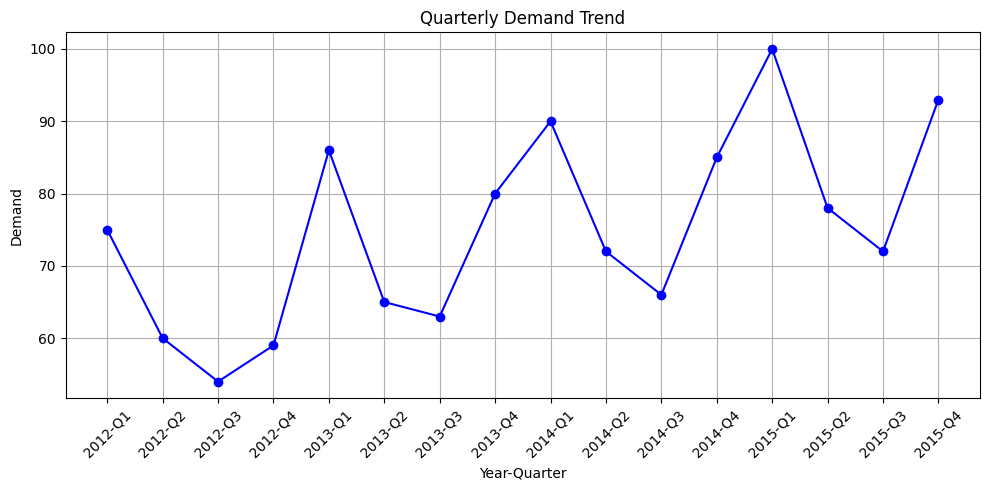

In [3]:
quarter_df['time'] = quarter_df['year'].astype(str) + '-' + quarter_df['quarter']
plt.figure(figsize=(10, 5))
plt.plot(quarter_df['time'], quarter_df['demand'], marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.title('Quarterly Demand Trend')
plt.xlabel('Year-Quarter')
plt.ylabel('Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

**Q2. Build a simple moving average model to forecast demand for next quarter.**

**a. Plot the moving average forecast against the actual demand.**

**b. Use forecasted values of all four quarters of 2015 to calculate RMSE and MAPE.**

**Ans:-**

In [4]:
quarter_df['mavg'] = quarter_df['demand'].rolling(window=12).mean().shift(1)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
quarter_df[['demand', 'mavg']][12:]

,demand,mavg
12,100,71.25
13,78,73.33
14,72,74.83
15,93,76.33


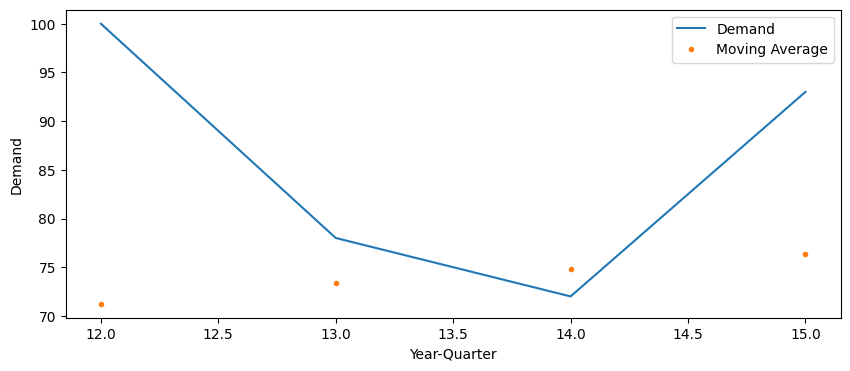

In [5]:
plt.figure(figsize=(10, 4))
plt.xlabel("Year-Quarter")
plt.ylabel("Demand")

# Assign labels for the legend
plt.plot(quarter_df['demand'][12:], label="Demand")
plt.plot(quarter_df['mavg'][12:], '.', label="Moving Average")

plt.legend()
plt.show()

In [6]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

# Mean Absolute Percentage Error
get_mape(quarter_df['demand'][12:].values, quarter_df['mavg'][12:].values)

np.float64(14.15)

In [7]:
from sklearn.metrics import mean_squared_error

# RMSE
np.sqrt(mean_squared_error(quarter_df['demand'][12:].values, quarter_df['mavg'][12:].values))

np.float64(16.838540861171236)

**Q3. Build an exponential moving average model to forecast demand for next quarter.**

**a. Plot the forecasted values against the actual demand.**

In [8]:
quarter_df['ewm'] = quarter_df['demand'].ewm(alpha=0.2).mean()
pd.options.display.float_format = '{:.2f}'.format
quarter_df[12:]

,year,quarter,demand,time,mavg,ewm
12,2015,Q1,100,2015-Q1,71.25,80.16
13,2015,Q2,78,2015-Q2,73.33,79.71
14,2015,Q3,72,2015-Q3,74.83,78.11
15,2015,Q4,93,2015-Q4,76.33,81.18


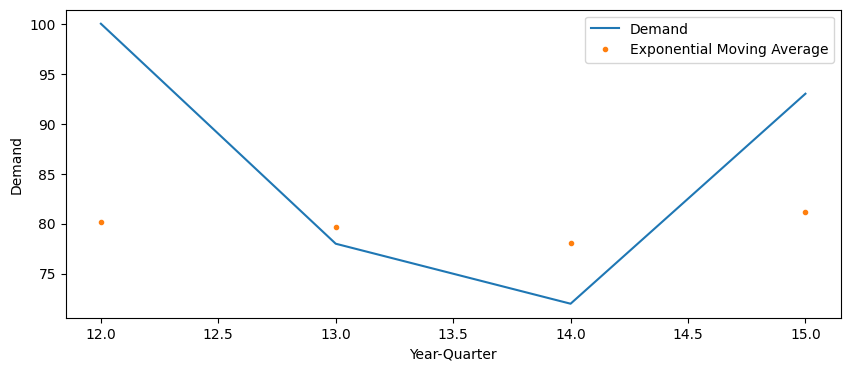

In [9]:
plt.figure(figsize=(10, 4))
plt.xlabel("Year-Quarter")
plt.ylabel("Demand")

# Assign labels for the legend
plt.plot(quarter_df['demand'][12:], label="Demand")
plt.plot(quarter_df['ewm'][12:], '.', label="Exponential Moving Average")

plt.legend()
plt.show()

**b. Use forecasted values of all four quarters of 2015 to calculate RMSE and MAPE.**

In [10]:
# MAPE
get_mape(quarter_df['demand'][12:].values, quarter_df['ewm'][12:].values)

np.float64(10.81)

In [11]:
# RMSE
np.sqrt(mean_squared_error(quarter_df['demand'][12:].values, quarter_df['ewm'][12:].values))

np.float64(11.97474388531023)

**4. Build an ARMA model to forecast demand for next quarter.**

**a. Draw ACF and PACF plots to find out p and q values**

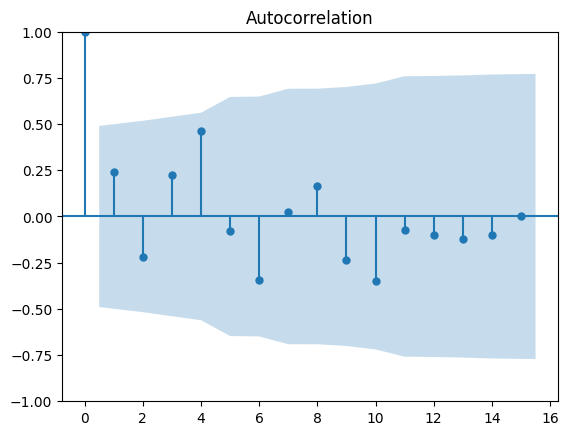

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(quarter_df.demand, lags=15)

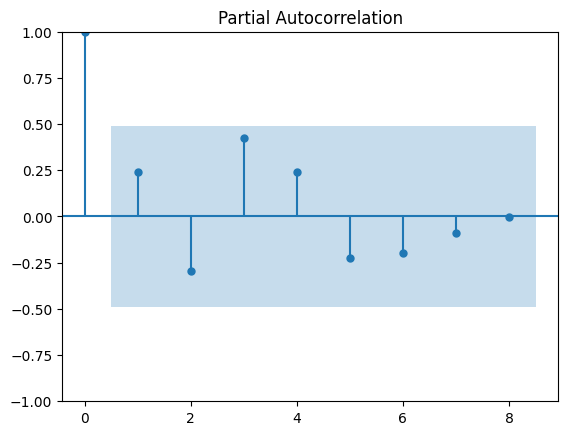

In [13]:
pacf_plot = plot_pacf(quarter_df.demand, lags=8)

In [14]:
quarter_train = quarter_df[0:12]
quarter_test = quarter_df[12:]

In [16]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(quarter_train.demand.astype(np.float64).values, order=(1, 1, 1))
arima_model = arima.fit()
arima_model.summary()

C:\Users\rahak\.virtualenvs\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -43.827
Date:                Thu, 12 Jun 2025   AIC                             93.654
Time:                        13:53:54   BIC                             94.848
Sample:                             0   HQIC                            92.902
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1559      0.588      0.265      0.791      -0.996       1.308
ma.L1         -0.8437      0.610     -1.382      0.167      -2.040       0.353
sigma2       154.8506     99.734      1.553      0.121     -40.624     350.325
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.99   Prob(JB):                         0.53
Heteroskedasticity (H):               0.76   Skew:                             0.50
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
quarter_predict = arima_model.forecast(steps = 15)

quarter_predict

array([75.65040317, 74.19252574, 73.96519973, 73.92975291, 73.92422571,
       73.92336385, 73.92322946, 73.92320851, 73.92320524, 73.92320473,
       73.92320465, 73.92320464, 73.92320464, 73.92320464, 73.92320464])

In [20]:
get_mape(quarter_df.demand[12:], quarter_predict[12:])

ValueError: operands could not be broadcast together with shapes (4,) (3,) 